In [1]:
import numpy as np
import pickle
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [16]:
# padded test data
MAX_SEQ_LEN=10
MIN_SEQ_LEN=5
with open('../triangle_tests.pkl','rb') as fp:
    sin = np.array(pickle.load(fp))
    print sin.shape
#     print(sin[:,0])
    seq=[]
    for i in range(len(sin)):
        seq.append(sin[i][0])
    
    sinee = pad_sequences(seq,maxlen=10,dtype='float32')
    for i in range(len(sin)):
        sin[i][0] = sinee[i] 

(10, 2)


[0.         0.         0.         0.1501085  0.14947188 0.14883526
 0.14819865 0.14756203 0.1469254  0.14628878] 0.14565216508373122


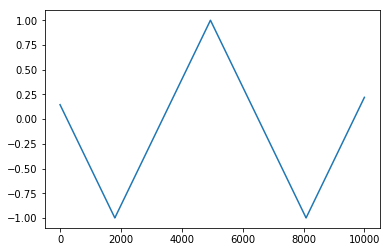

In [3]:
print sin[0][0], sin[0][1][0]
plt.plot(sin[0][1])

In [7]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.models import load_model

model = load_model('sin_model.h5')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10, 1)             0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 4)                 24        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


9991/9991 [==============================] - 0s 18us/step
((9991, 10, 1), (9991, 1))


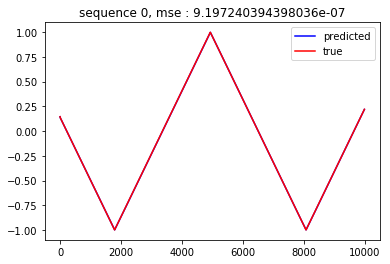

9991/9991 [==============================] - 0s 20us/step
((9991, 10, 1), (9991, 1))


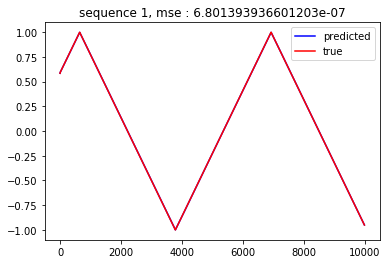

9991/9991 [==============================] - 0s 19us/step
((9991, 10, 1), (9991, 1))


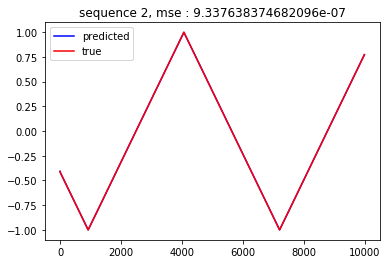

9991/9991 [==============================] - 0s 19us/step
((9991, 10, 1), (9991, 1))


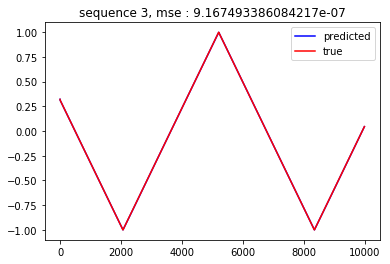

9991/9991 [==============================] - 0s 18us/step
((9991, 10, 1), (9991, 1))


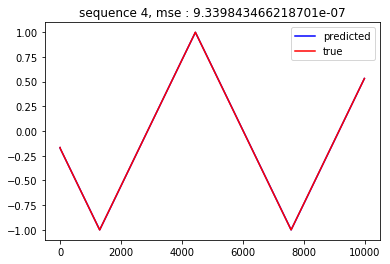

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


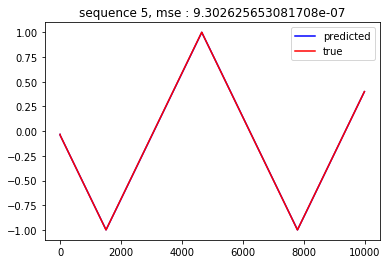

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


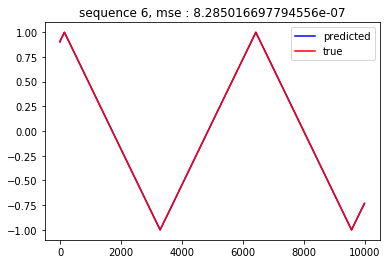

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


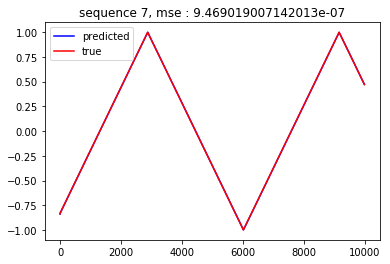

9991/9991 [==============================] - 0s 16us/step
((9991, 10, 1), (9991, 1))


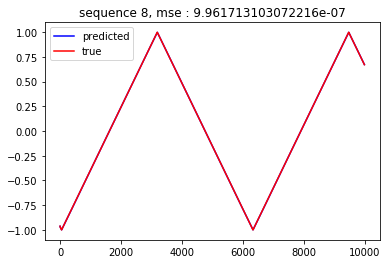

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


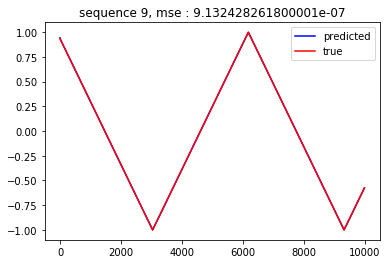

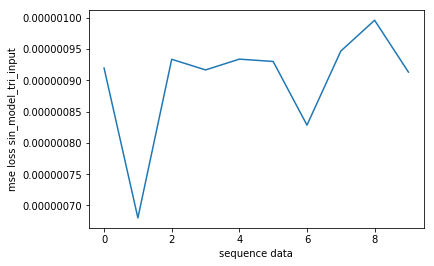

In [19]:
mse=[]
for l in range(len(sin)):
    sin_test=[]
    sin_label=[]
    sin_test.append(sin[l][0])
    sin_label.append(sin[l][1][0])
    i=0
    seq_len = len(sin[l][0])
    while(i<len(sin[l][1])-MAX_SEQ_LEN):

        sin_test.append(sin[l][1][i:i+seq_len])
        sin_label.append(sin[l][1][i+seq_len])
        i+=1

    padXs = pad_sequences(sin_test, maxlen=MAX_SEQ_LEN,dtype='float32')
    sin_test = np.array(padXs)
    sin_test = np.expand_dims(sin_test, axis=2)
    sin_label = np.array(sin_label)
    sin_label = np.expand_dims(sin_label, axis=1)
    
    y_pred = model.predict(sin_test)
    z= model.evaluate(sin_test,sin_label)
    mse.append(z)
    plt.plot(y_pred[:],'b-',label="predicted")
    plt.plot(sin_label[:], 'r-', label="true")
    plt.legend()
    
    plt.title("sequence "+str(l)+", mse : "+str(model.evaluate(sin_test, sin_label)))
    print(sin_test.shape, sin_label.shape)
    plt.savefig("../sin_model_tri_input/sequence_"+str(l)+"_sin.png")
    plt.show()
plt.plot(mse)
plt.xlabel("sequence data")
plt.ylabel("mse loss sin_model_tri_input")
plt.savefig('../sin_model_tri_input/mse_loss_sin.png')
plt.show()

1000/1000 [==============================] - 0s 24us/step


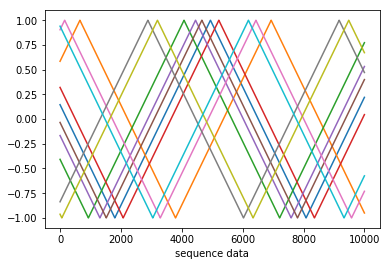

Text(0,0.5,'mse loss')

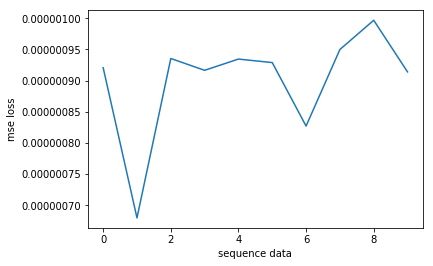

In [18]:
mse=[]
for l in range(len(sin)):
    sin_test=[]
    sin_label=[]
    sin_test.append(sin[l][0])
    sin_label.append(sin[l][1][0])
    i=0
    seq_len=len(sin[l][0])
    while(i<len(sin[l][1])-10):
#         seq_len = np.random.randint(5,11)
    #     seq_len = 50
    #     print(i, seq_len)
        sin_test.append(sin[l][1][i:i+seq_len])
        sin_label.append(sin[l][1][i+seq_len])
        i+=seq_len

    plt.plot(sin[l][1])
    padXs = pad_sequences(sin_test, maxlen=10,dtype='float32')
    sin_test = np.array(padXs)
    sin_test = np.expand_dims(sin_test, axis=2)
    sin_label = np.array(sin_label)
    sin_label = np.expand_dims(sin_label, axis=1)
    sin_test,sin_label = shuffle(sin_test,sin_label)
#     print(sin_test.shape, sin_label.shape)
    z= model.evaluate(sin_test,sin_label)
    mse.append(z)

plt.xlabel("sequence data")
plt.ylabel("")
plt.show()
plt.plot(mse)
plt.xlabel("sequence data")
plt.ylabel("mse loss")